In [ ]:
import os, json, math, time, random
from pathlib import Path
from typing import List, Dict, Any

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
code
#VSC-c84d897a
python
import numpy as np
from typing import Dict

import matplotlib.pyplot as plt

def summarize_series(x: pd.Series) -> Dict[str, float]:
    v = x.dropna().to_numpy()
    if v.size == 0:
        return {"mean": None, "std": None, "min": None, "max": None, "p25": None, "p50": None, "p75": None, "n": 0}
    return {
        "mean": float(np.mean(v)),
        "std": float(np.std(v, ddof=1)) if v.size > 1 else 0.0,
        "min": float(np.min(v)),
        "max": float(np.max(v)),
        "p25": float(np.percentile(v, 25)),
        "p50": float(np.percentile(v, 50)),
        "p75": float(np.percentile(v, 75)),
        "n": int(v.size),
    }

metrics_to_aggregate = ["relevance", "factuality", "fkgl", "smog", "dale_chall"]

if per_sample_df.empty:
    print("No hay métricas disponibles para resumir.")
else:
    combined_metrics = (
        per_sample_df
        .groupby("doc_id")
        .agg(
            relevance=("relevance", "mean"),
            factuality=("factuality", "mean"),
            fkgl=("fkgl", "mean"),
            smog=("smog", "mean"),
            dale_chall=("dale_chall", "mean"),
            sample_count=("model", "count")
        )
        .reset_index()
    )

    print("=== Estadísticas globales (modelo combinado) ===")
    for metric in metrics_to_aggregate:
        stats = summarize_series(combined_metrics[metric])
        print(f"\n{metric.upper()}: n={stats['n']}")
        if stats["n"] == 0:
            print("  sin datos disponibles")
        else:
            print(
                "  mean={mean:.4f}  std={std:.4f}  min={min:.4f}  p25={p25:.4f}  p50={p50:.4f}  p75={p75:.4f}  max={max:.4f}".format(**stats)
            )

    print("\n=== Distribución de muestras por documento ===")
    sample_counts = combined_metrics["sample_count"].describe()
    print(sample_counts.to_string())

    def plot_distribution(series: pd.Series, title: str) -> None:
        valores = series.dropna().to_numpy()
        if valores.size == 0:
            print(f"[skip] {title}: sin datos")
            return

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].hist(valores, bins=30, alpha=0.7)
        axes[0].set_title(f"{title} — Histograma")
        axes[0].set_xlabel("Valor")
        axes[0].set_ylabel("Frecuencia")
        axes[0].grid(alpha=0.3)

        axes[1].boxplot(valores, vert=True, showmeans=True)
        axes[1].set_title(f"{title} — Boxplot")
        axes[1].set_ylabel("Valor")
        axes[1].grid(alpha=0.3)

        plt.tight_layout()
        plt.show()

    for metric in metrics_to_aggregate:
        plot_distribution(combined_metrics[metric], metric.capitalize())
# Save metrics results
metrics_output_file = METRICS_OUTPUT_FILE
per_sample_df.to_csv(metrics_output_file, index=False)
print(f"Metrics saved to {metrics_output_file}")

per_sample_df.head(), per_sample_df.shape

## Resultados


=== Estadísticas para GEN_1 ===

RELEVANCE: n=30
  mean=0.8335  std=0.0106  min=0.8106  p25=0.8260  p50=0.8364  p75=0.8399  max=0.8512

FACTUALITY: n=30
  mean=0.3046  std=0.0547  min=0.1867  p25=0.2824  p50=0.3090  p75=0.3351  max=0.4099

FKGL: n=30
  mean=10.0033  std=1.2419  min=7.7000  p25=9.1000  p50=10.1000  p75=10.5750  max=13.4000

SMOG: n=30
  mean=12.6267  std=1.0976  min=10.4000  p25=11.9250  p50=12.3500  p75=13.3000  max=15.0000

DALE_CHALL: n=30
  mean=7.9217  std=0.6620  min=6.9500  p25=7.5050  p50=7.7700  p75=8.2525  max=9.8600

=== Estadísticas para GEN_2 ===

RELEVANCE: n=30
  mean=0.8357  std=0.0112  min=0.8119  p25=0.8282  p50=0.8355  p75=0.8454  max=0.8539

FACTUALITY: n=30
  mean=0.3024  std=0.0625  min=0.1546  p25=0.2658  p50=0.2997  p75=0.3371  max=0.4444

FKGL: n=30
  mean=10.3033  std=1.2355  min=8.2000  p25=9.4250  p50=10.6000  p75=11.2500  max=13.3000

SMOG: n=30
  mean=12.8367  std=1.0804  min=11.0000  p25=11.7500  p50=13.0500  p75=13.6750  max=14.7000

DAL

/var/folders/5s/kf7ph7pd0w12ldc2vjrxpgjh0000gp/T/ipykernel_27369/1112796174.py:79: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([gen1_data, gen2_data], labels=['Gen 1', 'Gen 2'], showmeans=True)


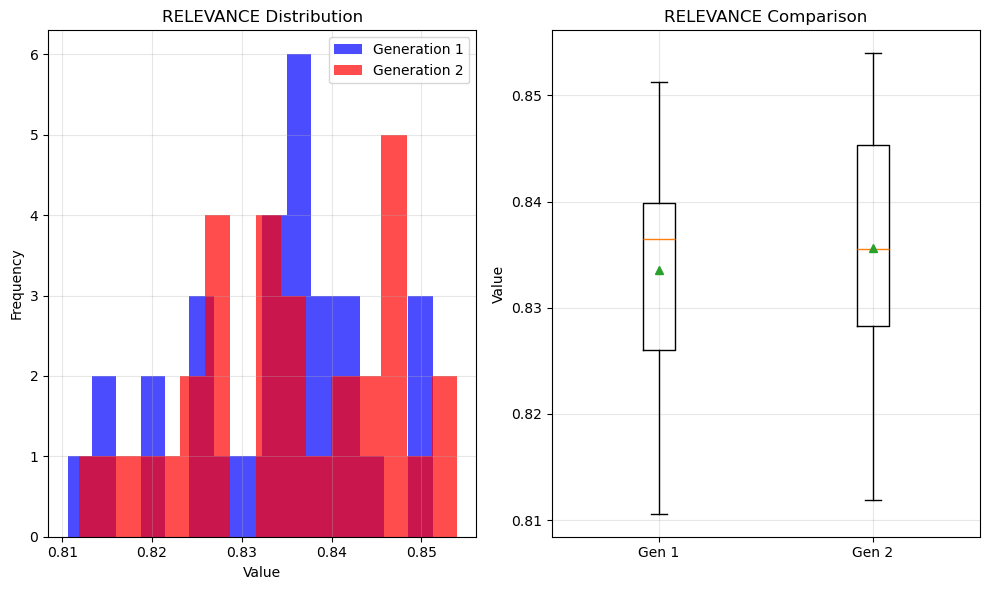

/var/folders/5s/kf7ph7pd0w12ldc2vjrxpgjh0000gp/T/ipykernel_27369/1112796174.py:79: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([gen1_data, gen2_data], labels=['Gen 1', 'Gen 2'], showmeans=True)


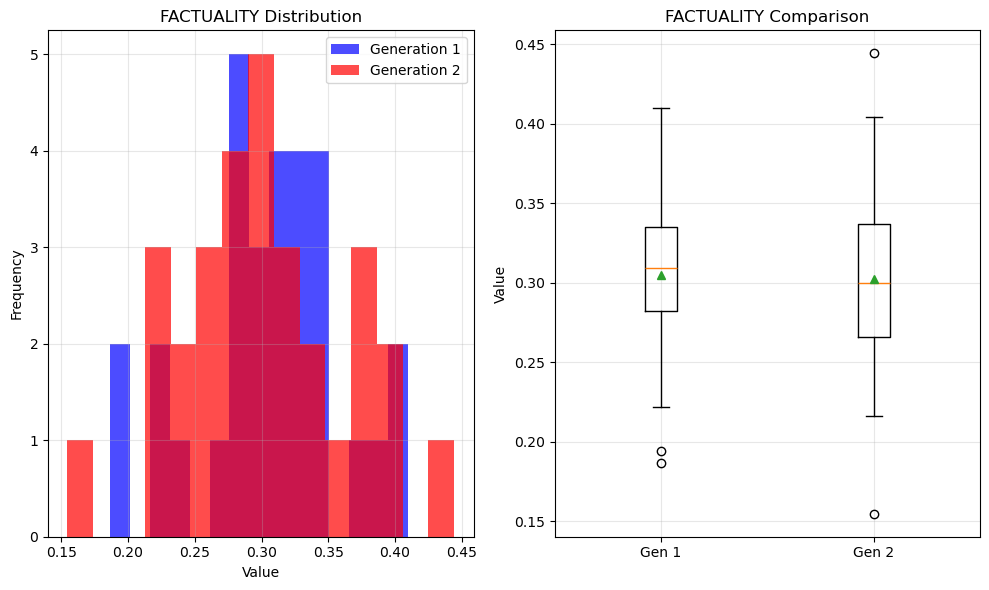

/var/folders/5s/kf7ph7pd0w12ldc2vjrxpgjh0000gp/T/ipykernel_27369/1112796174.py:79: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([gen1_data, gen2_data], labels=['Gen 1', 'Gen 2'], showmeans=True)


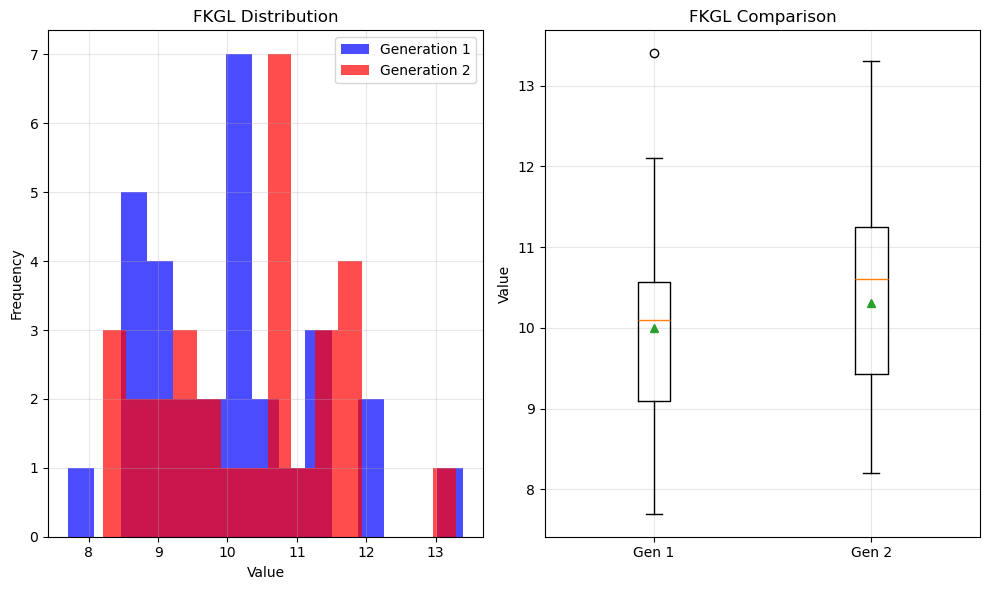

/var/folders/5s/kf7ph7pd0w12ldc2vjrxpgjh0000gp/T/ipykernel_27369/1112796174.py:79: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([gen1_data, gen2_data], labels=['Gen 1', 'Gen 2'], showmeans=True)


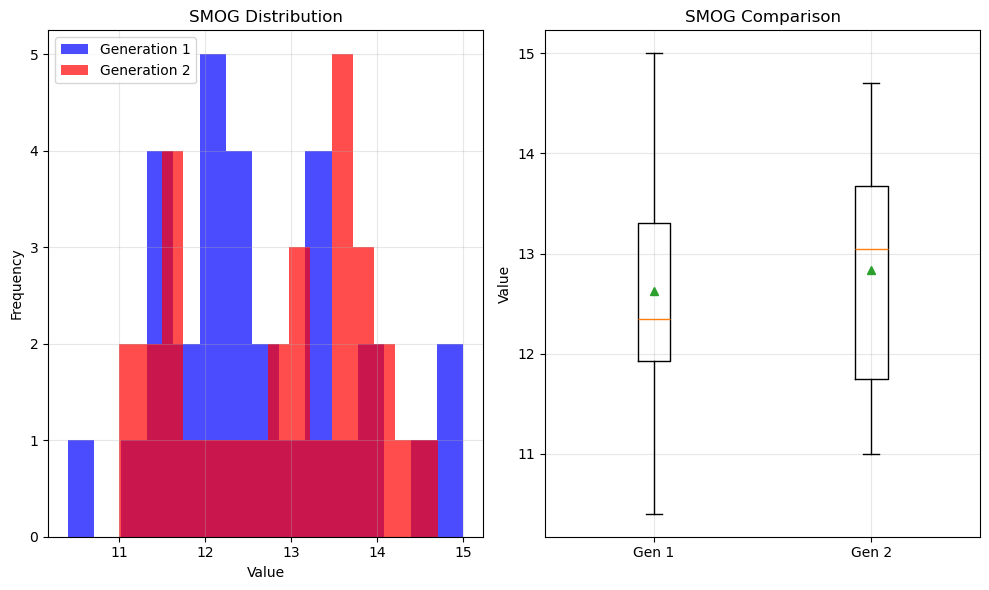

/var/folders/5s/kf7ph7pd0w12ldc2vjrxpgjh0000gp/T/ipykernel_27369/1112796174.py:79: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([gen1_data, gen2_data], labels=['Gen 1', 'Gen 2'], showmeans=True)


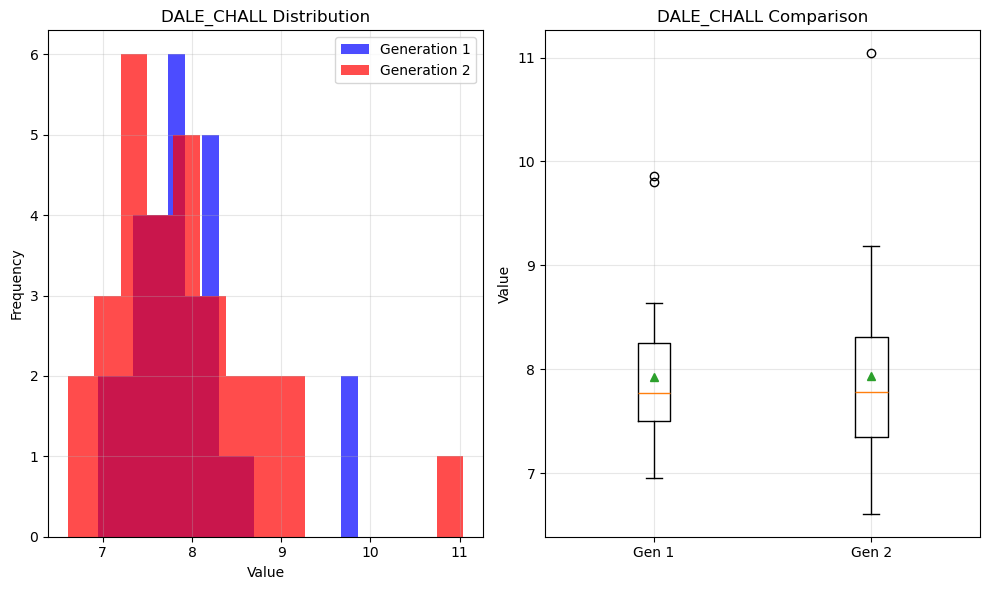

In [7]:
import numpy as np
from typing import Dict

import matplotlib.pyplot as plt

def summarize_series(x: pd.Series) -> Dict[str, float]:
    v = x.dropna().to_numpy()
    if v.size == 0:
        return {"mean": None,"std": None,"min": None,"max": None,"p25": None,"p50": None,"p75": None,"n": 0}
    return {
        "mean": float(np.mean(v)),
        "std":  float(np.std(v, ddof=1)) if v.size > 1 else 0.0,
        "min":  float(np.min(v)),
        "max":  float(np.max(v)),
        "p25":  float(np.percentile(v, 25)),
        "p50":  float(np.percentile(v, 50)),
        "p75":  float(np.percentile(v, 75)),
        "n":    int(v.size),
    }

# Análisis por generación
for generation in ['gen_1', 'gen_2']:
    gen_data = per_sample_df[per_sample_df['model'] == generation]
    
    if len(gen_data) == 0:
        print(f"No data for {generation}")
        continue
    
    print(f"\n=== Estadísticas para {generation.upper()} ===")
    
    # Agregación por generación
    stats = {
        "relevance":   summarize_series(gen_data["relevance"]),
        "factuality":  summarize_series(gen_data["factuality"]),
        "fkgl":        summarize_series(gen_data["fkgl"]),
        "smog":        summarize_series(gen_data["smog"]),
        "dale_chall":  summarize_series(gen_data["dale_chall"]),
    }

    # Imprimir estadísticas
    for k, s in stats.items():
        print(f"\n{k.upper()}: n={s['n']}")
        print(f"  mean={s['mean']:.4f}  std={s['std']:.4f}  min={s['min']:.4f}  p25={s['p25']:.4f}  p50={s['p50']:.4f}  p75={s['p75']:.4f}  max={s['max']:.4f}")

# Comparación entre generaciones
print("\n=== COMPARACIÓN ENTRE GENERACIONES ===")
for metric in ["relevance", "factuality", "fkgl", "smog", "dale_chall"]:
    gen1_values = per_sample_df[per_sample_df['model'] == 'gen_1'][metric]
    gen2_values = per_sample_df[per_sample_df['model'] == 'gen_2'][metric]
    
    print(f"\n{metric.upper()}:")
    print(f"  Gen 1 mean:   {gen1_values.mean():.4f}")
    print(f"  Gen 2 mean:   {gen2_values.mean():.4f}")
    print(f"  Difference:   {gen2_values.mean() - gen1_values.mean():.4f}")

# Graficar comparaciones
def plot_comparison(metric_name: str):
    gen1_data = per_sample_df[per_sample_df['model'] == 'gen_1'][metric_name].dropna()
    gen2_data = per_sample_df[per_sample_df['model'] == 'gen_2'][metric_name].dropna()
    
    if len(gen1_data) == 0 or len(gen2_data) == 0:
        print(f"[skip] {metric_name}: insufficient data")
        return
    
    plt.figure(figsize=(10,6))
    
    # Histograma comparativo
    plt.subplot(1,2,1)
    plt.hist(gen1_data, bins=15, alpha=0.7, label='Generation 1', color='blue')
    plt.hist(gen2_data, bins=15, alpha=0.7, label='Generation 2', color='red')
    plt.title(f'{metric_name.upper()} Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(alpha=0.3)
    
    # Boxplot comparativo
    plt.subplot(1,2,2)
    plt.boxplot([gen1_data, gen2_data], labels=['Gen 1', 'Gen 2'], showmeans=True)
    plt.title(f'{metric_name.upper()} Comparison')
    plt.ylabel('Value')
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Plot all metrics
for metric in ["relevance", "factuality", "fkgl", "smog", "dale_chall"]:
    plot_comparison(metric)
